# Type-Aware Decomposed Framework for Few-Shot Named Entity Recognition 


Source: https://arxiv.org/pdf/2302.06397v2.pdf


Steps today:
1. Read paper
2. Download datasets
3. Understands Eval Criteria
4. Implement methodology
5. Compare Results


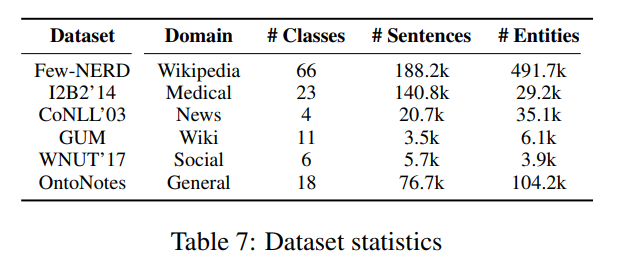

## Datasets

1. Few-Nerd https://huggingface.co/datasets/DFKI-SLT/few-nerd

In [2]:
!curl -X GET \
     "https://huggingface.co/api/datasets/DFKI-SLT/few-nerd/parquet/inter/train"

["https://huggingface.co/api/datasets/DFKI-SLT/few-nerd/parquet/inter/train/0.parquet"]

In [3]:
!wget https://huggingface.co/api/datasets/DFKI-SLT/few-nerd/parquet/inter/train/0.parquet

--2024-02-02 09:57:10--  https://huggingface.co/api/datasets/DFKI-SLT/few-nerd/parquet/inter/train/0.parquet
Resolving huggingface.co (huggingface.co)... 99.84.108.129, 99.84.108.55, 99.84.108.70, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://huggingface.co/datasets/DFKI-SLT/few-nerd/resolve/refs%2Fconvert%2Fparquet/inter/train/0000.parquet [following]
--2024-02-02 09:57:11--  https://huggingface.co/datasets/DFKI-SLT/few-nerd/resolve/refs%2Fconvert%2Fparquet/inter/train/0000.parquet
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/datasets/dfki-nlp/few-nerd/8f6f07bf3e67ff9922947236b19152a27eba457f4c774880807345f642be2cb8?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%270000.parquet%3B+filename%3D%220000.parquet%22%3B&Expires=1707145031&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlv

In [5]:
!ls -alh | grep parque

-rw-rw-r-- 1 skruz skruz  16M Apr 12  2023 0.parquet


In [9]:
import pandas as pd

data_fewnerd = pd.read_parquet('0.parquet')
data_fewnerd

,id,tokens,ner_tags,fine_ner_tags
0,0,"[When, reconstruction, of, the, building, was,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"[The, Institute, of, International, Finance, m...","[5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, ...","[29, 29, 29, 29, 29, 0, 0, 0, 0, 0, 9, 9, 9, 0..."
2,2,"[Harbor, Police, is, the, premier, police, pre...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, ..."
3,3,"[Harbor, Police, jurisdiction, extends, throug...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 0..."
4,4,"[The, Beinecke, Rare, Book, and, Manuscript, L...","[0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 29, 29, 0, 0, 0, 0, 0..."
...,...,...,...,...
130107,130107,"[Ernesto, Maserati, (, 4, August, 1898, –, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
130108,130108,"[The, alliance, was, formed, by, the, Sammarin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
130109,130109,"[It, won, 40, of, the, 60, seats, in, the, Gra...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 32, 32, 0, ..."
130110,130110,"[In, June, 2017, ,, he, made, his, debut, for,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 5, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 37, 37, 0, 37, 37,..."


'Crater Lake is deep , the deepest freshwater body in the US and the second deepest in North America after Great Slave Lake in Canada .'

In [30]:
from promptedgraphs.vis import render_entities
from promptedgraphs.models import EntityReference

def fewnerd_sample_to_entities(tokens, tags, labels=None):
    labels = labels or {}
    ents = []
    start = 0
    prev_tag = None
    assert len(tokens) == len(tags)
    for t, tag in zip(tokens, tags):
        if tag == 0:
            start += len(t) + 1
            prev_tag = tag
            continue

        if tag == prev_tag:
            ents[-1].end += len(t)+1
            ents[-1].text += ' ' + t
        else:
            ents.append(
                EntityReference(
                    start=start,
                    end=start+len(t),
                    label=labels.get(tag, f'id_{tag}'),
                    text=t,
                )
            )
        prev_tag = tag
        start += len(t) + 1

    text = ' '.join(s['tokens'])
    return text, ents


In [28]:
s

id                                                            1942
tokens           [Crater, Lake, is, deep, ,, the, deepest, fres...
ner_tags         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, ...
fine_ner_tags    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0,...
Name: 1942, dtype: object

In [31]:
s = data_fewnerd.sample(1).iloc[0]
render_entities(*fewnerd_sample_to_entities(s['tokens'], s['ner_tags'] ))
render_entities(*fewnerd_sample_to_entities(s['tokens'], s['fine_ner_tags'] ))
    

In [ ]:
from pydantic import BaseModel, Field

from promptedgraphs.config import Config
from promptedgraphs.ideation import brainstorm
from promptedgraphs.config import Config, load_config
from promptedgraphs.entity_recognition import extract_entities
from promptedgraphs.models import EntityReference
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer
from typing import NamedTuple, Dict, List
import asyncio
import datetime

_ = load_config()